|  |  |
|----------|----------|
| Name: | Elad Siman Tov |
|  Course:   | ME 036049   |
|  Homerwork:   | No. 3   |


# Theory 

### Problem 3.1
If the activation function would be a linear function, the mapping would be also a linear function and the model will not be able to capture anything but a linear combination of inputs to predict the outputs.
If the activation function was removed, the outcome would be similar to what was described before.

### Problem 3.5
proof of the non-negative homogeneity property of the ReLU function:

$$\forall \alpha > 0: ReLU[\alpha z] = \max(0, [\alpha z]) = \max(\alpha \cdot 0, \alpha \cdot z) =\alpha \max(0, z) = \alpha ReLU[z]$$


### Problem 3.10
The four linear regions are the outcome of having three different ReLU regions for the three hidden units (think of each activated unit as adding another joint to the output function). If any two units happen to have the same zero point, e.g. having the same ratio between weight and bias of a different unit, the outcome can have less than four linear regions. All in all, the number of linear regions will have to be between 1 and 4.


### Problem 4.4
The equations for a deep neural network that takes Di = 5 inputs, Do = 4 outputs and has three hidden layers of sizes D1 = 20, D2 = 10, and D3 = 7 are as follows:

In layered form:
$$h_1^{20\times 1}=a[\beta_{0}^{20\times 1} + \Omega_0^{20 \times 5}x^{5 \times 1}]$$
$$h_2^{10\times 1}=a[\beta_{1}^{10\times 1} + \Omega_1^{10\times 20}h_1^{20\times 1}]$$
$$h_3^{20\times 1}=a[\beta_{2}^{7 \times 1} + \Omega_2^{7\times 10}h_2^{10\times 1}]$$
$$y^{4\times 1}=\beta_{3}^{4\times1} + \Omega_3^{4\times 7}h_3^{20\times 1}$$
One line form:
$$y^{D_o\times 1} = \beta_{3}^{D_o\times1} + \Omega_3^{D_o\times D_3}
a[\beta_{2}^{D_3 \times 1} + \Omega_2^{D_3\times D_2}
a[\beta_{1}^{D_2\times 1} + \Omega_1^{D_2\times D_1}
a[\beta_{0}^{D_1\times 1} + \Omega_0^{D_1 \times D_i}x]]]$$
$$y^{4\times 1} = \beta_{3}^{4\times1} + \Omega_3^{4\times 7}
a[\beta_{2}^{7 \times 1} + \Omega_2^{7\times 10}
a[\beta_{1}^{10\times 1} + \Omega_1^{10\times 20}
a[\beta_{0}^{20\times 1} + \Omega_0^{20 \times 5}x^{5 \times 1}]]]$$

### Problem 4.5
Consider a deep neural network with Di = 5 inputs, Do = 1 output, and K = 20
hidden layers containing D = 30 hidden units each. What is the depth of this network? What
is the width?

### Problem 4.6

Problem 4.6 Consider a network with Di = 1 input, Do = 1 output, and K = 10 layers, with
D = 10 hidden units in each. Would the number of weights increase more if we increased the
depth by one or the width by one? Provide your reasoning.


# Computation

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import *

#### 1. Neural Network

In [2]:
def init_weights(n_inputs, n_hidden, n_output):
    W0, W1, W2 = np.random.randn(n_inputs, n_hidden), np.random.randn(n_hidden, n_hidden), np.random.randn(n_hidden, n_output), 
    return W0, W1, W2


def feedforward(x, W0, W1, W2, a):
    z0 = x @ W0 # dimentions of 1000 x n_hidden
    a0 = a(z0)
    z1 = a0 @ W1 # dimentions of 1000 x n_hidden
    a1 = a(z1)
    z2 = a1 @ W2 # dimentions of 1000 x n_output
    a2 = a(z2)
    return [[z0, z1, z2], [a0, a1, a2]]


def predict(x, W0, W1, W2):
    activation_function = lambda p: 1 / (1 + np.exp(-p))
    forward = feedforward(x, W0=W0, W1=W1, W2=W2, a=activation_function)
    return forward[-1][-1]



In [3]:
# Test the implementation
n_inputs = 10
n_hidden = 5
n_output = 3
n_samples = 1000 # added this parameter to make the data more explanatory, we have 1000 samples, 10 inputs and 3 outputs.

X_train = np.random.randn(n_samples, n_inputs) 
Y_train = np.random.randn(n_samples, n_output)

# Normalize inputs and outputs to a 0-1 scale
sigmoid = lambda s: 1 / (1 + np.exp(-s))
X_train = sigmoid(X_train)
Y_train = sigmoid(Y_train)


W0, W1, W2 = init_weights(n_inputs, n_hidden, n_output)
Y_predicted = predict(X_train, W0, W1, W2) 
loss_per_sample = np.sqrt(np.sum(np.square(Y_predicted - Y_train), axis=1))



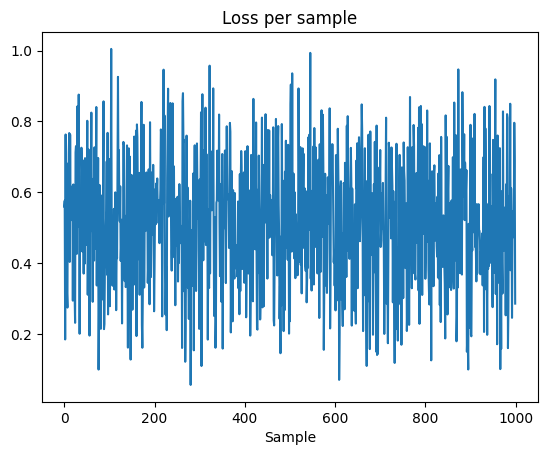

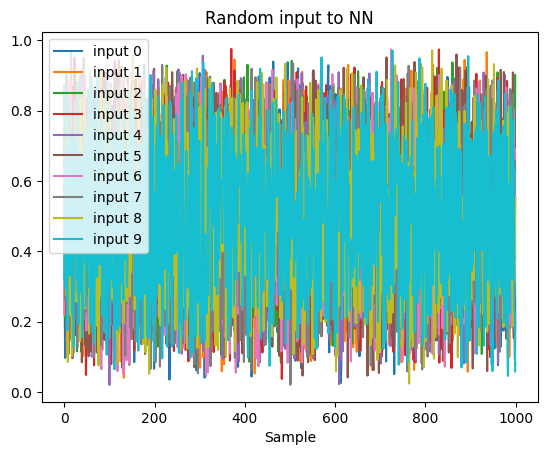

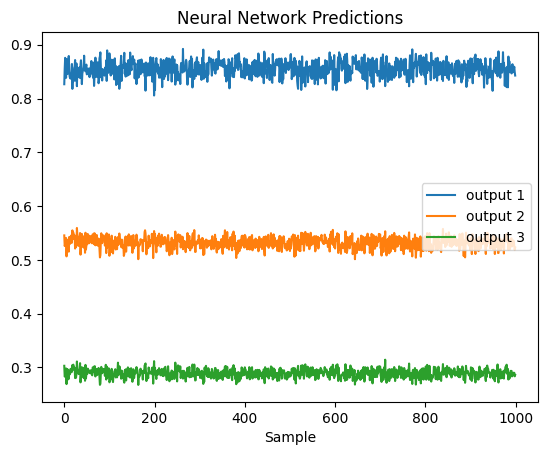

In [6]:
# Plot inputs, loss and outputs

plt.plot(loss_per_sample)
plt.title('Loss per sample')
plt.xlabel("Sample")
plt.show()

plt.plot(X_train, label=[f'input {_}' for _ in range(X_train.shape[1])])
plt.title('Random input to NN')
plt.xlabel("Sample")
plt.legend()
plt.show()

plt.plot(Y_predicted, label=['output 1', 'output 2', 'output 3'])
plt.title('Neural Network Predictions')
plt.xlabel("Sample")
plt.legend()
plt.show()



#### 2. Forward Propogation

In [7]:
def forward_propogation(W, A, f):
    W = np.hstack([W, np.zeros([W.shape[0], 1])]) # update W to have zeros for the biases in last col
    A = np.hstack([A, np.zeros([A.shape[0], 1])]) # update A to have ones to multiply the biases
    Z = W @ A
    A_out = f(Z)
    return A_out

# Define some inputs
W = np.array([[1,2],[3,4]])
A = np.array([[1,2],[3,4],[1,1]])
f = lambda x: x**2

# Call the forward propogation function
A_out = forward_propogation(W, A, f)

# Display nicely the output matrix before activation function (SymPy)
print("Output before activation function:")
Matrix(np.sqrt(A_out))




Output before activation function:


Matrix([
[ 7.0, 10.0, 0],
[15.0, 22.0, 0]])

In [8]:
# Display nicely the output matrix after activation function (SymPy)
print("Output after activation function:")
Matrix(A_out)


Output after activation function:


Matrix([
[ 49.0, 100.0, 0],
[225.0, 484.0, 0]])

#### 3. Non Linear activation functions

In [9]:
def sigmoid(z):
    result = 1 / (1 + np.exp(-z))
    return result

print("Sigmoid dunction output to z=0 is:",sigmoid(z=0))
print("Sigmoid function output to z=2 is:", sigmoid(z=2))
print("Sigmoid function output to z=-2 is:", sigmoid(z=-2))




Sigmoid dunction output to z=0 is: 0.5
Sigmoid function output to z=2 is: 0.8807970779778823
Sigmoid function output to z=-2 is: 0.11920292202211755


#### 4. Implement ReLU activation function

In [10]:
def relu(z):
    return np.maximum(0, z)

# Apply ReLU activation to scalar
scalar_input = -2.5
relu_scalar = relu(scalar_input)
print(f"ReLU activation applied to {relu_scalar} is:", relu_scalar)

# Apply ReLU activation to a list
list_input = [-2.5, 0, 3.2, -1]
relu_list = relu(list_input)
print(f"ReLU activation applied to {relu_list} is:", relu_list)

# Apply ReLU activation to a numpy array
array_input = np.array([-2.5, 0, 3.2, -1])
relu_array = relu(array_input)
print(f"ReLU activation applied to {relu_array} is:", relu_array)

ReLU activation applied to 0.0 is: 0.0
ReLU activation applied to [0.  0.  3.2 0. ] is: [0.  0.  3.2 0. ]
ReLU activation applied to [0.  0.  3.2 0. ] is: [0.  0.  3.2 0. ]


#### 5. Pytorch Textbook example

In [11]:
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import StepLR
# define input size, hidden layer size, output size
D_i, D_k, D_o = 10, 40, 5
# create model with two hidden layers
model = nn.Sequential(
        nn.Linear(D_i, D_k),
        nn.ReLU(),
        nn.Linear(D_k, D_k),
        nn.ReLU(),
        nn.Linear(D_k, D_o))

# He initialization of weights
def weights_init(layer_in):
    if isinstance(layer_in, nn.Linear):
        nn.init.kaiming_uniform(layer_in.weight)
        layer_in.bias.data.fill_(0.0)

model.apply(weights_init)

# choose least squares loss function
criterion = nn.MSELoss()

# construct SGD optimizer and initialize learning rate and momentum
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum=0.9)

# object that decreases learning rate by half every 10 epochs
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

# create 100 random data points and store in data loader class
x = torch.randn(100, D_i)
y = torch.randn(100, D_o)
data_loader = DataLoader(TensorDataset(x,y), batch_size=10, shuffle=True)

# Initialize list of losses and a counter
loss_tracker = [0 for _ in range(1000)]
cnt = 0

# loop over the dataset 100 times
for epoch in range(100):
    epoch_loss = 0.0
    # loop over batches
    for i, data in enumerate(data_loader):
        # retrieve inputs and labels for this batch
        x_batch, y_batch = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward pass
        pred = model(x_batch)
        loss = criterion(pred, y_batch)
        # backward pass
        loss.backward()
        # SGD update
        optimizer.step()
        # update statistics
        epoch_loss += loss.item()
        loss_tracker[cnt] += loss.item()
        cnt+=1

# print error
print(f'Epoch {epoch:5d}, loss {epoch_loss:.3f}')
# tell scheduler to consider updating learning rate
scheduler.step()


C:\Users\Elad\AppData\Local\Temp\ipykernel_35932\3122349524.py:17: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  nn.init.kaiming_uniform(layer_in.weight)


Epoch    99, loss 3.112


Modify the code to output graphs showing
(i) loss convergence, (ii) prediction vs. original output values after training. Experiment with
hidden layer dimension and learning rate

Text(0, 0.5, 'Loss')

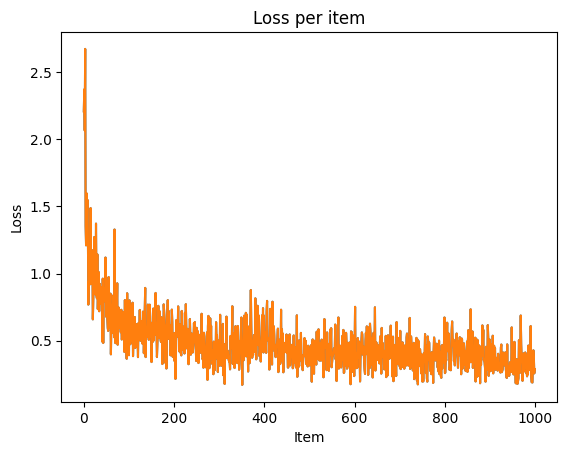

In [12]:
# Plot loss w.r.t iteration
plt.plot(loss_tracker, label="Loss per item")
plt.title("Loss per item")
plt.xlabel("Item")
plt.ylabel("Loss")

# Plot prediction vs. original output values after training
plt.plot(loss_tracker, label="Loss per item")
plt.title("Loss per item")
plt.xlabel("Item")
plt.ylabel("Loss")

